# Ukraine Coffee Shops

In [1]:
# import system and exploratory analysis modules
import platform; print(platform.platform())
import sys; print("Python", sys.version)
import numpy as np; print("Numpy", np.__version__)
import matplotlib
import matplotlib.pyplot as plt; print("Matplotlib", matplotlib.__version__)
import pandas as pd; print("Pandas", pd.__version__)
import seaborn as sns; print("Seaborn", sns.__version__)
import scipy; print("Scipy", scipy.__version__)
import sklearn; print("Scikit -Learn", sklearn.__version__)

Windows-10-10.0.19041-SP0
Python 3.6.12 |Anaconda, Inc.| (default, Sep  9 2020, 00:29:25) [MSC v.1916 64 bit (AMD64)]
Numpy 1.19.2
Matplotlib 3.3.2
Pandas 1.1.5
Seaborn 0.11.1
Scipy 1.5.2
Scikit -Learn 0.23.2


In [2]:
# set theme for seaborn
sns.set_style('darkgrid')
sns.set(font_scale = 1)

## Read Data

In [3]:
# function to read data, check for nulls and drop duplicates
def read_data(data_path):
    # read data
    print("Reading Alcohol Consumption in Russia dataset\n")
    df = pd.read_csv(data_path)
    # make a copy of dataframe
    print("Making a copy of the dataframe\n")
    df_1 = df.copy()
    # drop duplicates
    df_final = df_1.drop_duplicates()
    # extract feature names
    df_cols = df_final.columns.tolist()
    print("Data consists of:\n")
    print("...........................\n")
    print("Rows: {}\n".format(len(df_final)))
    print("Columns: {}\n".format(len(df_cols)))
    print("...........................\n")
    # empty list to hold data types, non nulss count, nulss count, percentage of nulls in a column,\
    # percentage of column nulls in datafram
    data_types = []
    non_nulls = []
    nulls = []
    null_column_percent = []
    null_df_percent = []
    
    # loop through columns and capture the variables above
    print("Extracting count and percentages of nulls and non nulls")
    for col in df_cols:
        
        # extract null count
        null_count = df_final[col].isna().sum()
        nulls.append(null_count)
        
        # extract non null count
        non_null_count = len(df_final) - null_count
        non_nulls.append(non_null_count)
        
        # extract % of null in column
        col_null_perc = 100 * null_count/len(df_final)
        null_column_percent.append(col_null_perc)
        
        # extract % of nulls out of total nulls in dataframe
        df_null_perc = 100 * null_count/df_final.isna().sum().sum()
        null_df_percent.append(df_null_perc)
        
        # capture data types
        data_types.append(df_final[col].dtypes) 
        
    # create zipped list with column names, data_types, nulls and non nulls
    lst_data = list(zip(df_cols, data_types, non_nulls, nulls, null_column_percent, null_df_percent))
    # create dataframe of zipped list
    df_zipped = pd.DataFrame(lst_data, columns = ['Feature', 'DataType', 'CountOfNonNulls', 'CountOfNulls',\
                                                 'PercentOfNullsIinColumn', 'PercentOfNullsInData'])
    return df_final, df_cols, df_zipped

In [4]:
path = 'data/Ukraine Cities Coffee Shops Analysis - Main.csv'
df, features, df_QA = read_data(path)

Reading Alcohol Consumption in Russia dataset

Making a copy of the dataframe

Data consists of:

...........................

Rows: 200

Columns: 9

...........................

Extracting count and percentages of nulls and non nulls


In [5]:
# check nulls and data type
df_QA

,Feature,DataType,CountOfNonNulls,CountOfNulls,PercentOfNullsIinColumn,PercentOfNullsInData
0,Region,object,200,0,0.0,0.000000
1,Place name,object,200,0,0.0,0.000000
2,Place type,object,200,0,0.0,0.000000
3,Rating,float64,198,2,1.0,0.743494
4,Reviews,float64,198,2,1.0,0.743494
5,Price,object,122,78,39.0,28.996283
6,Delivery option,object,129,71,35.5,26.394052
7,Dine in option,object,140,60,30.0,22.304833
8,Takeout option,object,144,56,28.0,20.817844


In [6]:
# inspect first 5 rows of data
df.head()

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
0,Mariupol,Dim Kavu,Coffee store,4.6,206.0,NaN,NaN,NaN,NaN
1,Mariupol,Коферум,Cafe,5.0,24.0,$$,False,NaN,True
2,Mariupol,Кофейня Світ Чаю,Coffee shop,5.0,11.0,NaN,NaN,NaN,True
3,Mariupol,Кофейня Starcoff,Coffee shop,4.4,331.0,$$,False,True,True
4,Mariupol,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,NaN,NaN,True,True


In [7]:
# describe categorical features
df.describe(exclude = 'number')

,Region,Place name,Place type,Price,Delivery option,Dine in option,Takeout option
count,200,200,200,122,129,140,144
unique,10,187,14,3,2,1,1
top,Odessa,Dim Kavy,Coffee shop,$$,False,True,True
freq,20,4,97,116,94,140,144


In [8]:
# describe numerric features
df.describe()

,Rating,Reviews
count,198.000000,198.000000
mean,4.663636,622.494949
std,0.221648,1400.898666
min,3.900000,3.000000
25%,4.600000,47.500000
50%,4.700000,271.500000
75%,4.800000,786.250000
max,5.000000,17937.000000


In [9]:
# check for unique values in categorical features
cols_to_check = ['Region', 'Place type', 'Price', 'Delivery option', 'Dine in option', 'Takeout option']
for col in cols_to_check:
    print(df[col].value_counts())

Odessa         20
Poltava        20
Khrivoy Rog    20
Zaporozhye     20
Mariupol       20
Dnipro         20
Kiev           20
Lviv           20
Kharkiv        20
Kherson        20
Name: Region, dtype: int64
Coffee shop                 97
Cafe                        58
Espresso bar                20
Coffee store                11
Store                        3
Pastry shop                  2
Coffee roasters              2
E-commerce service           1
Coffee stand                 1
Restaurant                   1
European restaurant          1
Internet shop                1
Chocolate shop               1
Appliance repair service     1
Name: Place type, dtype: int64
$$     116
$$$      4
$        2
Name: Price, dtype: int64
False    94
True     35
Name: Delivery option, dtype: int64
True    140
Name: Dine in option, dtype: int64
True    144
Name: Takeout option, dtype: int64


### Transform Data

In [10]:
place_type_vals_to_replace = {'Store': 'Other',
                            'Pastry shop': 'Other',
                            'Coffee roasters': 'Other',
                            'Appliance repair service': 'Other',
                            'Internet shop': 'Other',
                            'Restaurant': 'Other',
                            'Coffee stand': 'Other',
                            'Chocolate shop': 'Other',
                            'European restaurant': 'Other',
                            'E-commerce service': 'Other'}

In [11]:
# function to clean and transform data
def clean_and_transform(data):
    # Place type
    # Merge values less than 11 into other for place type column
    data['Place type'] = data['Place type'].replace(place_type_vals_to_replace)
    
    # Ratings
    # impute with mean of Rating
    data['Rating'] = data['Rating'].fillna(data['Rating'].mean())
    
     # Reviews
    # impute with mean of Reviews
    data['Reviews'] = data['Reviews'].fillna(data['Reviews'].mean())
    
    #  Price
    # impute missing values in price with most frequent
    data['Price'] = data['Price'].fillna(data['Price'].mode().iloc[0])
    price_range = []
    for price in data['Price']:
        if price == '$':
            price_range.append('below_10')
        elif price == '$$':
            price_range.append('10-100')
        elif price == '$$$':
            price_range.append('above_100')
    
    data['Price range'] = [price for price in price_range]
    
    # delivery option
    # impute missing values with most frequent
    data['Delivery option'] = data['Delivery option'].fillna(data['Delivery option'].mode().iloc[0])
    
    # Dine in option
    # replace missing vlues with False as it can either be True or False
    data['Dine in option'] = data['Dine in option'].fillna('False')
    
    # Takeout option
    # replace missing vlues with False as it can either be True or False
    data['Takeout option'] = data['Takeout option'].fillna('False')
    
    return data

In [12]:
df_clean = clean_and_transform(df)

In [13]:
df_clean['Price range'].value_counts()

10-100       194
above_100      4
below_10       2
Name: Price range, dtype: int64

## Exploratory Data Analysis

In [14]:
# compare data points by region
def regional_comparisons(data, hue):
    fig, ax = plt.subplots()
    # the size of A4 paper lanscape
    fig.set_size_inches(15, 8)
    sns.set_context("poster", font_scale = .6, rc={"grid.linewidth": 0.6})
    sns.countplot(x = 'Region', hue = hue, data = data)
    plt.setp(ax.get_xticklabels(), rotation=90)
    plt.title('Region vs ' + hue)
    plt.savefig(f'images/regionV{hue}.png')
    plt.show()

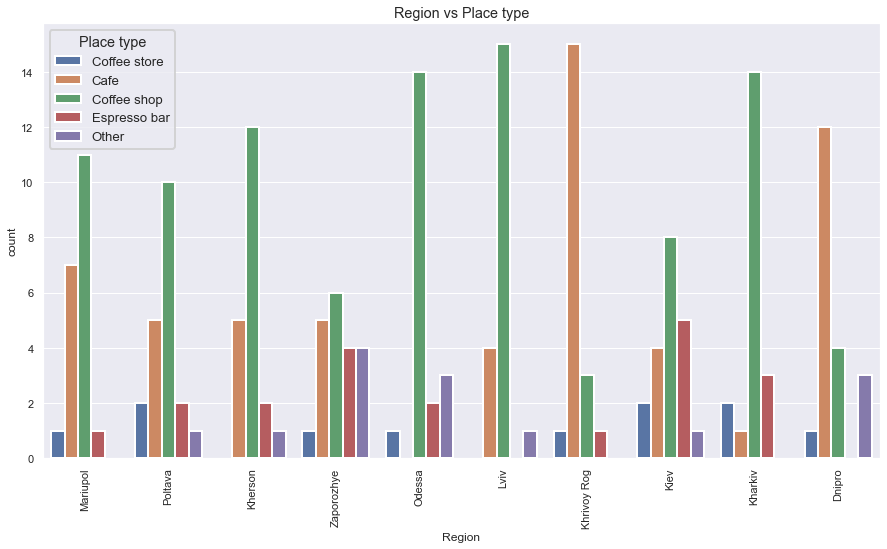

In [15]:
# Region and place type
regional_comparisons(df_clean, 'Place type')

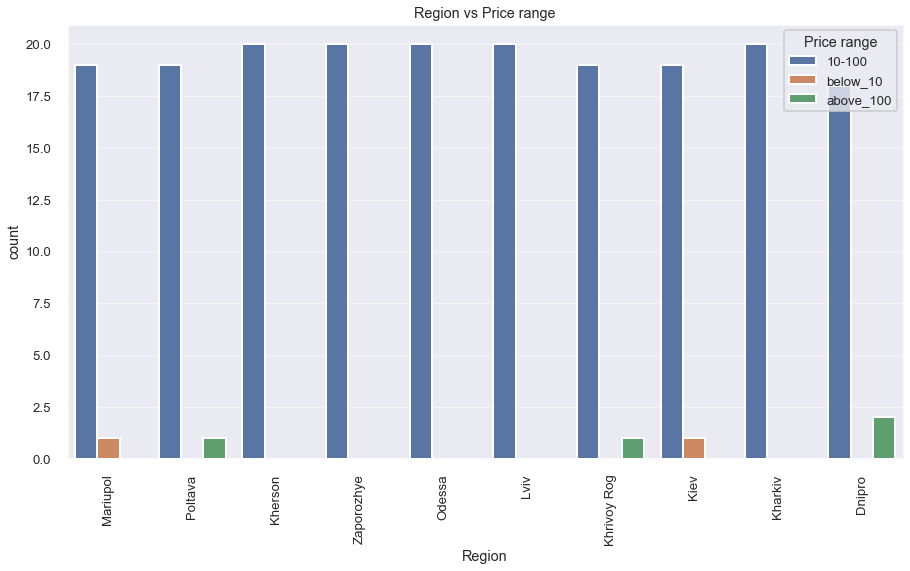

In [16]:
# Region vs Price
regional_comparisons(df_clean, 'Price range')

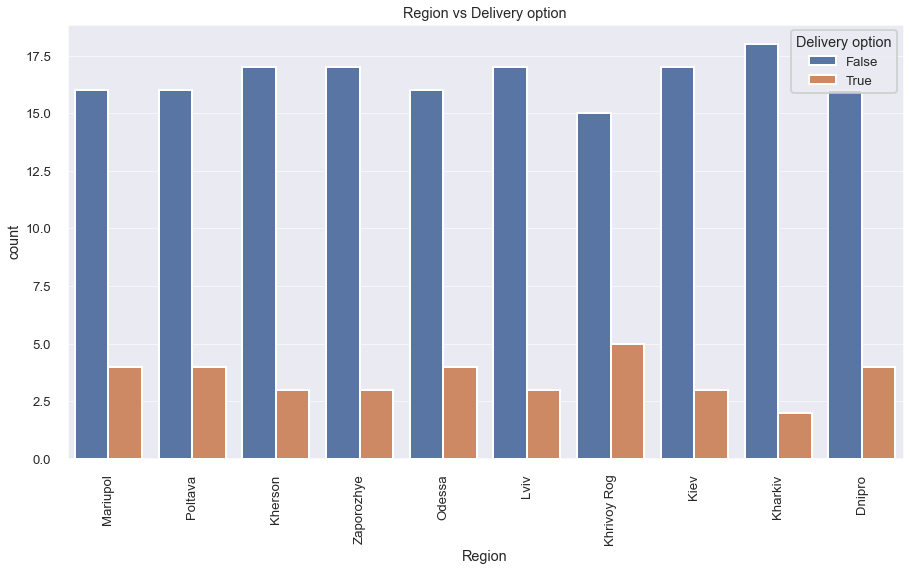

In [17]:
# Region vs Delivery option
regional_comparisons(df_clean, 'Delivery option')

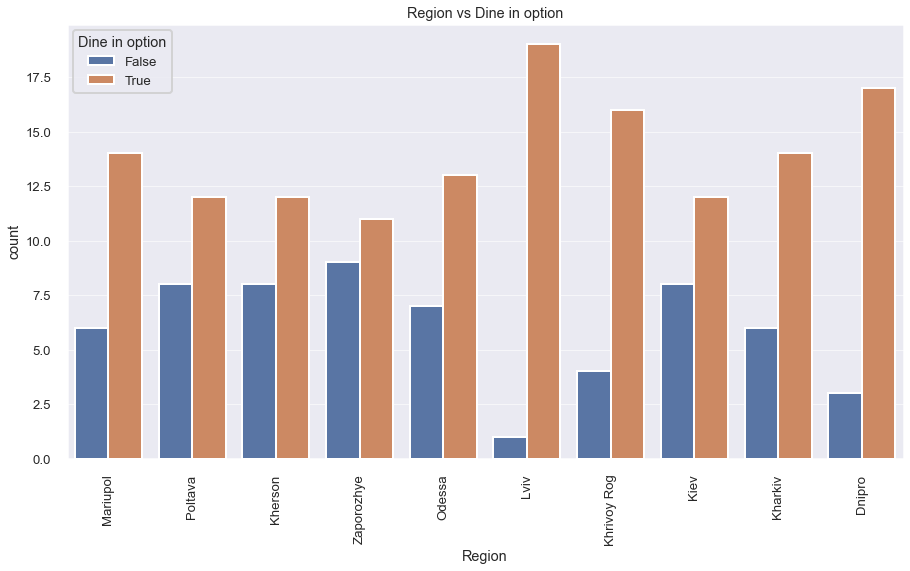

In [18]:
# Region vs Dine in option
regional_comparisons(df_clean, 'Dine in option')

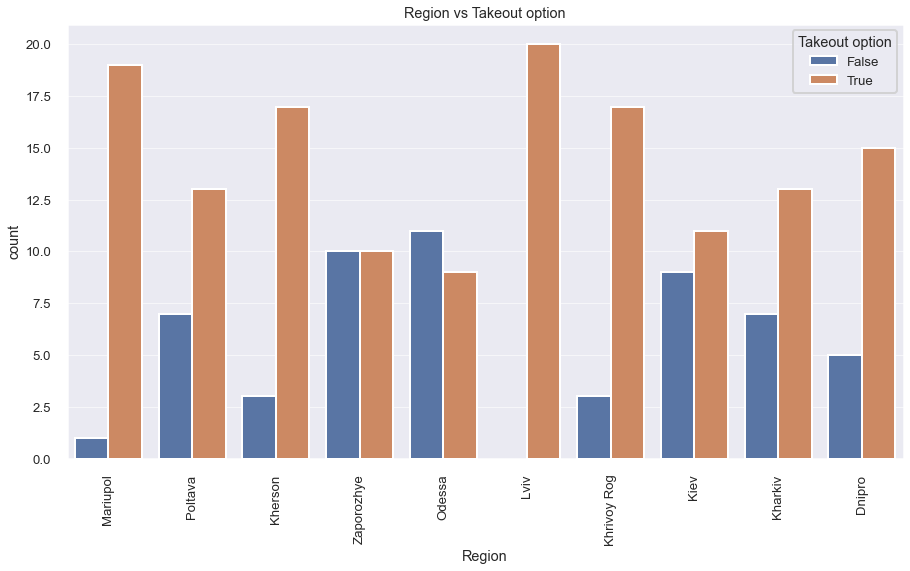

In [19]:
# Region vs Takeout option
regional_comparisons(df_clean, 'Takeout option')

In [20]:
# Relationship between Reviews and Rating and how they vary with other data points
def scatter_plot_categories(data, hue):
    fig, ax = plt.subplots()
    # the size of A4 paper lanscape
    fig.set_size_inches(15, 8)
    sns.set_context("poster", font_scale = .6, rc={"grid.linewidth": 0.6})
    sns.scatterplot(x = 'Reviews', y = 'Rating', hue = hue, data = data)
    plt.setp(ax.get_xticklabels(), rotation=90)
    plt.title('Relationship between Reviews and Rating vs ' + hue)
    plt.savefig(f'images/regionV{hue}.png')
    plt.show()

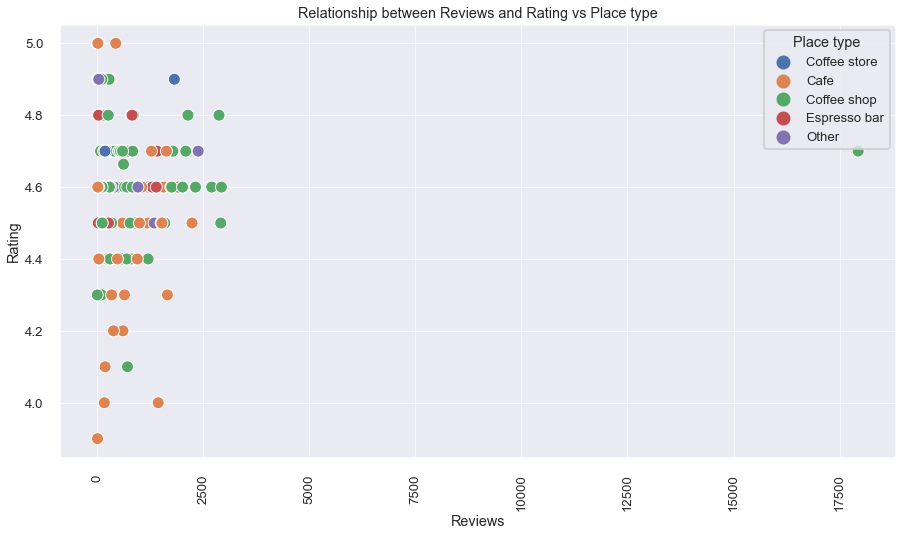

In [22]:
scatter_plot_categories(df_clean, 'Place type')

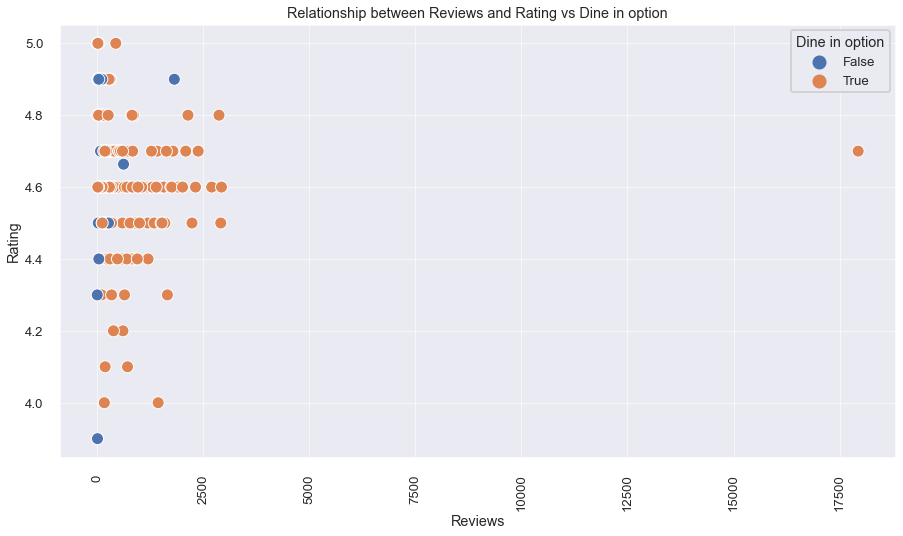

In [23]:
scatter_plot_categories(df_clean, 'Dine in option')

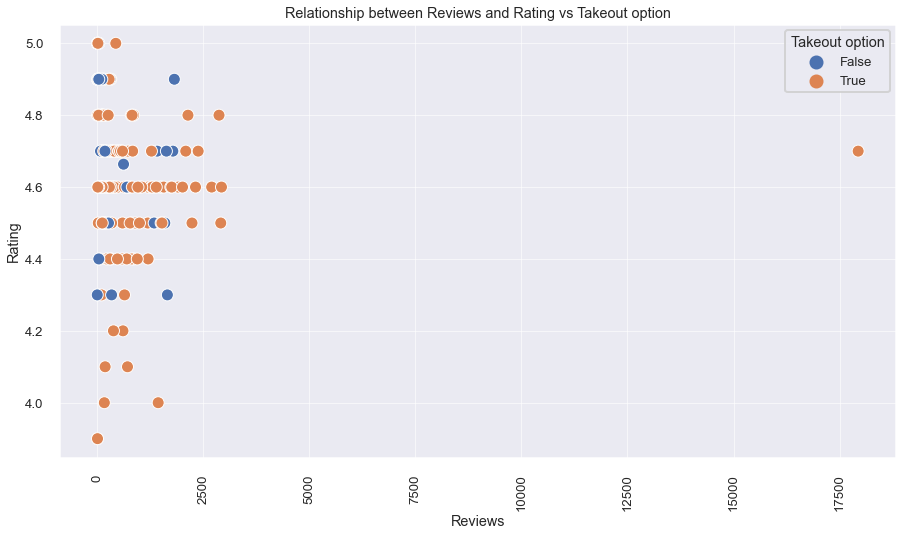

In [24]:
scatter_plot_categories(df_clean, 'Takeout option')

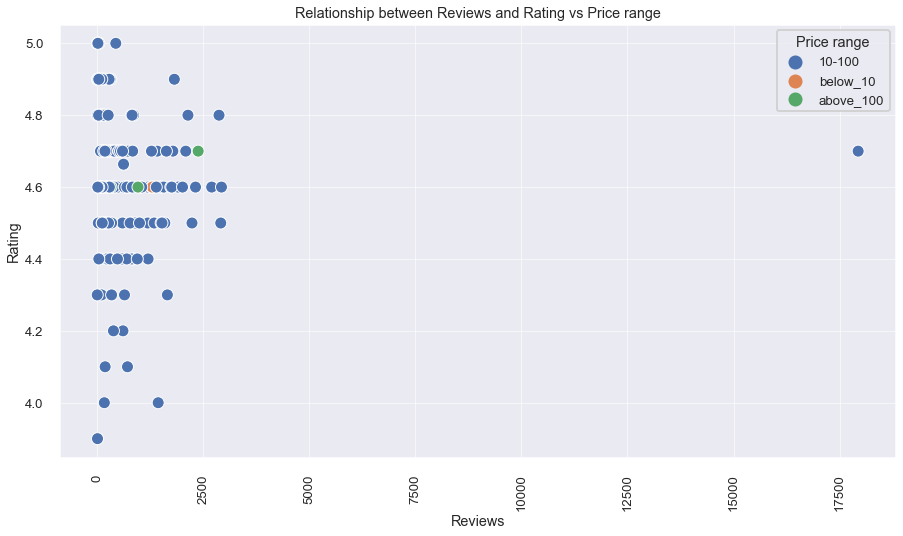

In [25]:
scatter_plot_categories(df_clean, 'Price range')

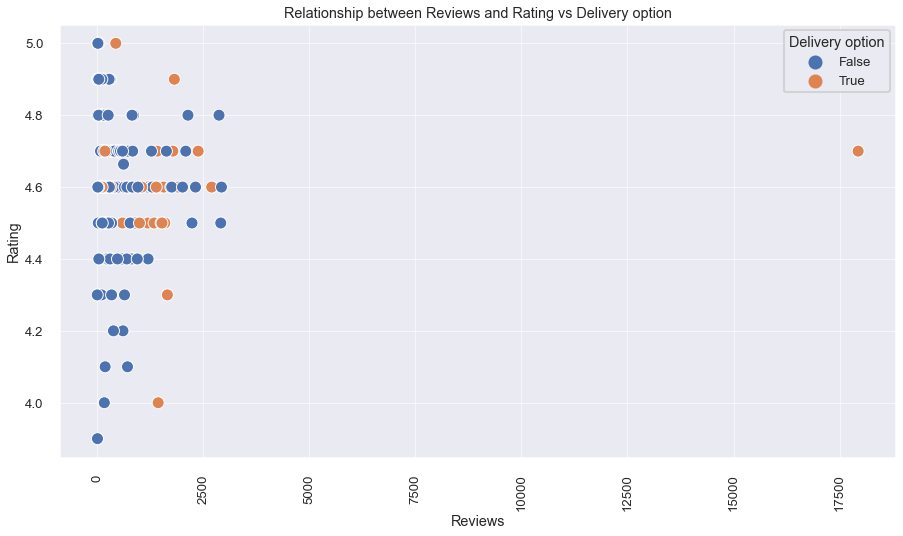

In [26]:
scatter_plot_categories(df_clean, 'Delivery option')

## Clustering of Coffee Shops by Region

In [ ]:
from sklearn.cluster import KMeans